In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression   
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
select = ['width', 'modelDate', 'height', 'driveWheelConfiguration', 'speed',
       'seatingCapacity', 'numberOfForwardGears', 'vEenginePower', 'torque',
       'curbWeight', 'price']
df = pd.read_csv('dataset/convert_number_data_17.csv')


In [22]:
# just select the columns we need in select list
df = df[select]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   width                    26304 non-null  float64
 1   modelDate                26304 non-null  int64  
 2   height                   26304 non-null  float64
 3   driveWheelConfiguration  26304 non-null  int64  
 4   speed                    26304 non-null  float64
 5   seatingCapacity          26304 non-null  float64
 6   numberOfForwardGears     26304 non-null  int64  
 7   vEenginePower            26304 non-null  float64
 8   torque                   26304 non-null  float64
 9   curbWeight               26304 non-null  float64
 10  price                    26304 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 2.2 MB


In [24]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   width                    26304 non-null  float64
 1   modelDate                26304 non-null  int64  
 2   height                   26304 non-null  float64
 3   driveWheelConfiguration  26304 non-null  int64  
 4   speed                    26304 non-null  float64
 5   seatingCapacity          26304 non-null  float64
 6   numberOfForwardGears     26304 non-null  int64  
 7   vEenginePower            26304 non-null  float64
 8   torque                   26304 non-null  float64
 9   curbWeight               26304 non-null  float64
 10  price                    26304 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 2.2 MB


In [25]:
df.isna().sum()

width                      0
modelDate                  0
height                     0
driveWheelConfiguration    0
speed                      0
seatingCapacity            0
numberOfForwardGears       0
vEenginePower              0
torque                     0
curbWeight                 0
price                      0
dtype: int64

In [26]:
# creating X and y variables
X = df.drop('price', axis=1)
# price column
y = np.log(df['price'])
# y = df['price']

In [27]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [28]:
# feature scale the X_train and X_test values

norm = StandardScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[ 1.60347686  0.71237348  1.13563181 ...  0.06359073  1.25751254
   0.74512226]
 [-1.04255702 -1.5719717  -0.8499645  ... -0.86454641 -1.16473433
  -0.69601444]
 [ 1.70359706  1.36504353  1.33419144 ...  3.02359564  1.45687442
   1.6422806 ]
 ...
 [ 0.38773157  0.87554099 -0.40104708 ... -0.56352896  0.26070313
   0.35946596]
 [ 0.08737096 -0.75613413 -0.17658836 ...  0.94155829 -0.09814826
   0.98869466]
 [ 1.11717874 -0.2666316   0.86800796 ...  1.69410191  0.65942689
   1.49207762]]


[[ 0.34482291  1.52821104  0.64354925 ... -0.66386811 -0.5367444
  -0.49303744]
 [-1.08546568  0.05970343 -0.09025809 ... -0.83946162 -1.08498958
  -1.20345694]
 [-0.04135501  0.71237348 -0.63413882 ... -0.21234194 -0.89559579
  -0.78938386]
 ...
 [ 1.10287586  0.71237348 -0.34061588 ...  2.94834128  1.45687442
   1.53673256]
 [ 0.31621714 -0.42979911 -0.20248744 ... -0.03674842 -0.64639344
   0.08747678]
 [ 0.93124123  1.52821104  2.52554923 ... -1.31607258 -0.23770158
  -0.16827424]]


In [29]:
# Fitting linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [30]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [31]:

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [32]:
# fit decision tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

TRAIN SCORE

In [33]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],

    'score': [linear.score(X_train, y_train), knn.score(X_train, y_train), dtr.score(X_train, y_train), rf.score(X_train, y_train),
              ]
    })
train_score

,model,score
0,LinearRegressor,0.901445
1,KNeighborsRegressor,0.974366
2,DecisionTree,0.990798
3,RandomForestRegressor,0.989172


In [34]:
linear_pred = np.exp(linear.predict(X_test))
knn_pred = np.exp(knn.predict(X_test))

rf_pred = np.exp(rf.predict(X_test))
dtr_pred = np.exp(dtr.predict(X_test))

y_test = np.exp(y_test)

EVALUATION TEST

In [35]:
best_model = pd.DataFrame({
  'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],
  'mae' : [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred), mean_absolute_error(y_test, dtr_pred), mean_absolute_error(y_test, rf_pred)],
  'mse' : [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred), mean_squared_error(y_test, dtr_pred), mean_squared_error(y_test, rf_pred)],
  'rmse' : [np.sqrt(mean_squared_error(y_test, linear_pred)), np.sqrt(mean_squared_error(y_test, knn_pred)), np.sqrt(mean_squared_error(y_test, dtr_pred)), np.sqrt(mean_squared_error(y_test, rf_pred))],
  'r2_score' : [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred), r2_score(y_test, dtr_pred), r2_score(y_test, rf_pred)]
  
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,4.109154,35.296751,5.941107,0.876834
1,KNeighborsRegressor,2.597766,14.397935,3.794461,0.949759
2,DecisionTree,2.684299,15.686954,3.960676,0.945261
3,RandomForestRegressor,2.311249,10.750398,3.278780,0.962487


In [36]:
# cat boost regressor
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(rf_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    27.479999999999997
Predict price: 30.953569397110357


Real price:    15.189999999999998
Predict price: 16.493041609479032


Real price:    23.994999999999994
Predict price: 22.109692713501147


Real price:    41.219999999999985
Predict price: 40.649977460313245


Real price:    63.42000000000001
Predict price: 69.1002798287737




In [37]:
import matplotlib.pyplot as plt

In [38]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.show()
    plt.savefig(f'image/result_model_{model}.png', dpi=120)


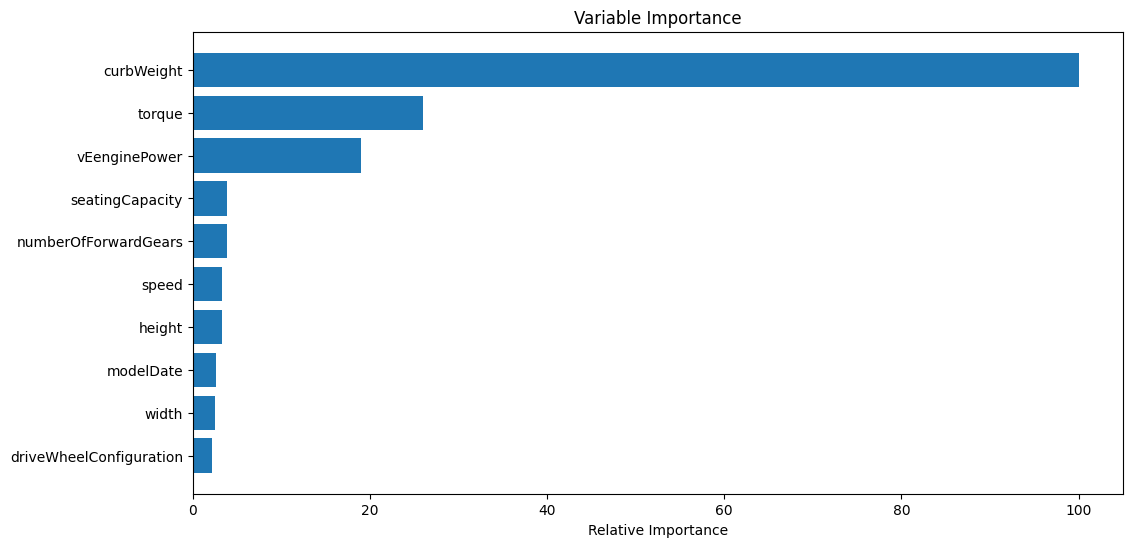

In [39]:
# fearure importance of decision tree regressor
feature_importance = dtr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [40]:
# print the features have high importance
print(X.columns[sorted_idx])

Index(['driveWheelConfiguration', 'width', 'modelDate', 'height', 'speed',
       'numberOfForwardGears', 'seatingCapacity', 'vEenginePower', 'torque',
       'curbWeight'],
      dtype='object')


In [41]:
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(rf_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    27.479999999999997
Predict price: 30.953569397110357


Real price:    15.189999999999998
Predict price: 16.493041609479032


Real price:    23.994999999999994
Predict price: 22.109692713501147


Real price:    41.219999999999985
Predict price: 40.649977460313245


Real price:    63.42000000000001
Predict price: 69.1002798287737


